In [59]:
import numpy as np
import pandas as pd
import tushare as ts
import seaborn as sns
import matplotlib.pyplot as plt
from tsdata import get_data
plt.style.use('dark_background')

In [22]:
start = "2014-01-01"
end = "2019-01-01"
symbols = ["000002.SZ", "601398.SH", "600104.SH", "600011.SH"]

price = get_data(symbols, start, end)
price.head()

,000002.SZ,601398.SH,600104.SH,600011.SH
20140102,6.5454,2.7655,10.2785,4.0876
20140103,6.4225,2.7501,9.9816,4.0309
20140106,6.1276,2.7423,9.6774,3.8609
20140107,6.0866,2.7423,9.7516,3.8205
20140108,6.0784,2.7578,9.9445,3.8528


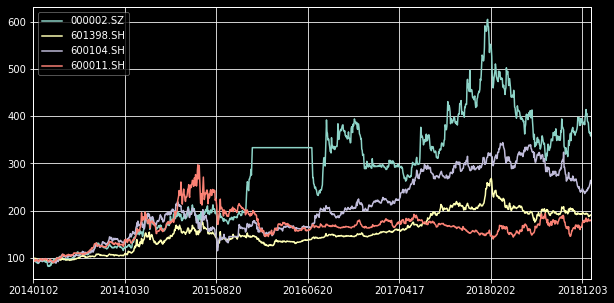

In [60]:
(price / price.iloc[0] * 100).plot(figsize=(10, 5))

In [24]:
returns = np.log(price / price.shift(1))
returns.head()

,000002.SZ,601398.SH,600104.SH,600011.SH
20140102,NaN,NaN,NaN,NaN
20140103,-0.018955,-0.005584,-0.029311,-0.013968
20140106,-0.047004,-0.002840,-0.030950,-0.043089
20140107,-0.006714,0.000000,0.007638,-0.010519
20140108,-0.001348,0.005636,0.019588,0.008419


In [25]:
return_mean = returns.mean() * 250
return_mean

000002.SZ    0.264923
601398.SH    0.133018
600104.SH    0.195547
600011.SH    0.121168
dtype: float64

In [35]:
return_cov = returns.cov() * 250
return_cov

,000002.SZ,601398.SH,600104.SH,600011.SH
000002.SZ,0.164989,0.041261,0.046839,0.044880
601398.SH,0.041261,0.063579,0.044286,0.037053
600104.SH,0.046839,0.044286,0.107104,0.054836
600011.SH,0.044880,0.037053,0.054836,0.137273


In [27]:
returns.corr()

,000002.SZ,601398.SH,600104.SH,600011.SH
000002.SZ,1.000000,0.402863,0.352354,0.298220
601398.SH,0.402863,1.000000,0.536672,0.396614
600104.SH,0.352354,0.536672,1.000000,0.452241
600011.SH,0.298220,0.396614,0.452241,1.000000


In [28]:
# 随机分配组合内的股票权重
weights = np.random.random(len(symbols))
weights = weights / np.sum(weights)
weights, sum(weights)

(array([0.40959485, 0.34121881, 0.03235773, 0.21682861]), 1.0)

In [45]:
# 计算组合收益、方差、标准差
portfolio_r = np.dot(weights.T, return_mean)
portfolio_var = np.dot(weights.T, np.dot(return_cov, weights))
portfolio_std = np.sqrt(portfolio_var)
portfolio_r, portfolio_std

(0.18649943920712708, 0.2638661958619203)

In [50]:
# 随机创建1k不同权重的组合
rand_returns = []
rand_stds = []
for i in range(1000):
    weights = np.random.random(len(symbols))
    weights /= np.sum(weights)
    
    rand_returns.append(np.dot(weights.T, returns.mean() * 250))
    
    var = np.dot(weights.T, np.dot(returns.cov() * 250, weights))
    rand_stds.append(np.sqrt(var))
    
rand_returns = np.array(rand_returns)
rand_stds = np.array(rand_stds)

In [51]:
rand_returns, rand_stds

(array([0.16832   , 0.20015667, 0.17964811, 0.16612927, 0.18201012,
        0.19759568, 0.18434341, 0.17800778, 0.19592963, 0.17209615,
        0.18312755, 0.19435305, 0.16345388, 0.15599706, 0.1784177 ,
        0.15937206, 0.17192934, 0.19417503, 0.15273525, 0.17694099,
        0.18338762, 0.19607838, 0.1394195 , 0.18665138, 0.18717737,
        0.19249534, 0.19894234, 0.15355626, 0.14667354, 0.2336663 ,
        0.16170755, 0.17984037, 0.20055538, 0.18391069, 0.2162344 ,
        0.18907576, 0.16058052, 0.1923382 , 0.18753708, 0.14030728,
        0.19253656, 0.14740541, 0.19582685, 0.18889187, 0.18107913,
        0.18754734, 0.18167802, 0.18000059, 0.17530138, 0.17848523,
        0.15889149, 0.19966966, 0.19206029, 0.18256212, 0.14517897,
        0.18299106, 0.17995246, 0.19785763, 0.19958156, 0.1812427 ,
        0.19404931, 0.21415669, 0.21590176, 0.17026601, 0.18916525,
        0.18587957, 0.21974578, 0.18487002, 0.20891444, 0.21285547,
        0.1876715 , 0.18169964, 0.17696033, 0.15

In [54]:
portfolios = pd.DataFrame({'returns': rand_returns, 'vol': rand_stds})
portfolios.head()

,returns,vol
0,0.168320,0.243124
1,0.200157,0.277151
2,0.179648,0.248901
3,0.166129,0.252454
4,0.182010,0.268853


Text(0, 0.5, 'vol')

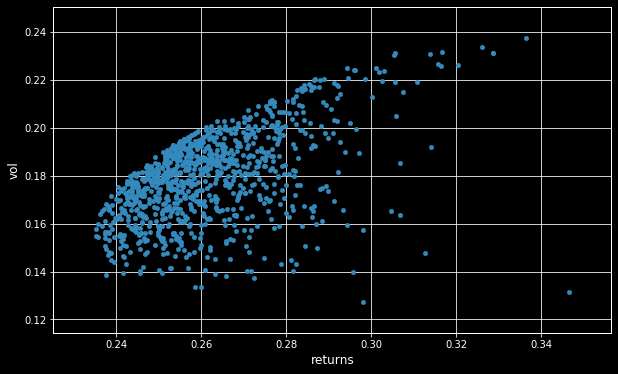

In [61]:
portfolios.plot(x='vol', y='returns', kind='scatter', figsize=(10, 6))
plt.xlabel('returns')
plt.ylabel('vol')